In [2]:
# import cogsworth and set some plotting things
import cogsworth
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
plt.style.use('dark_background')

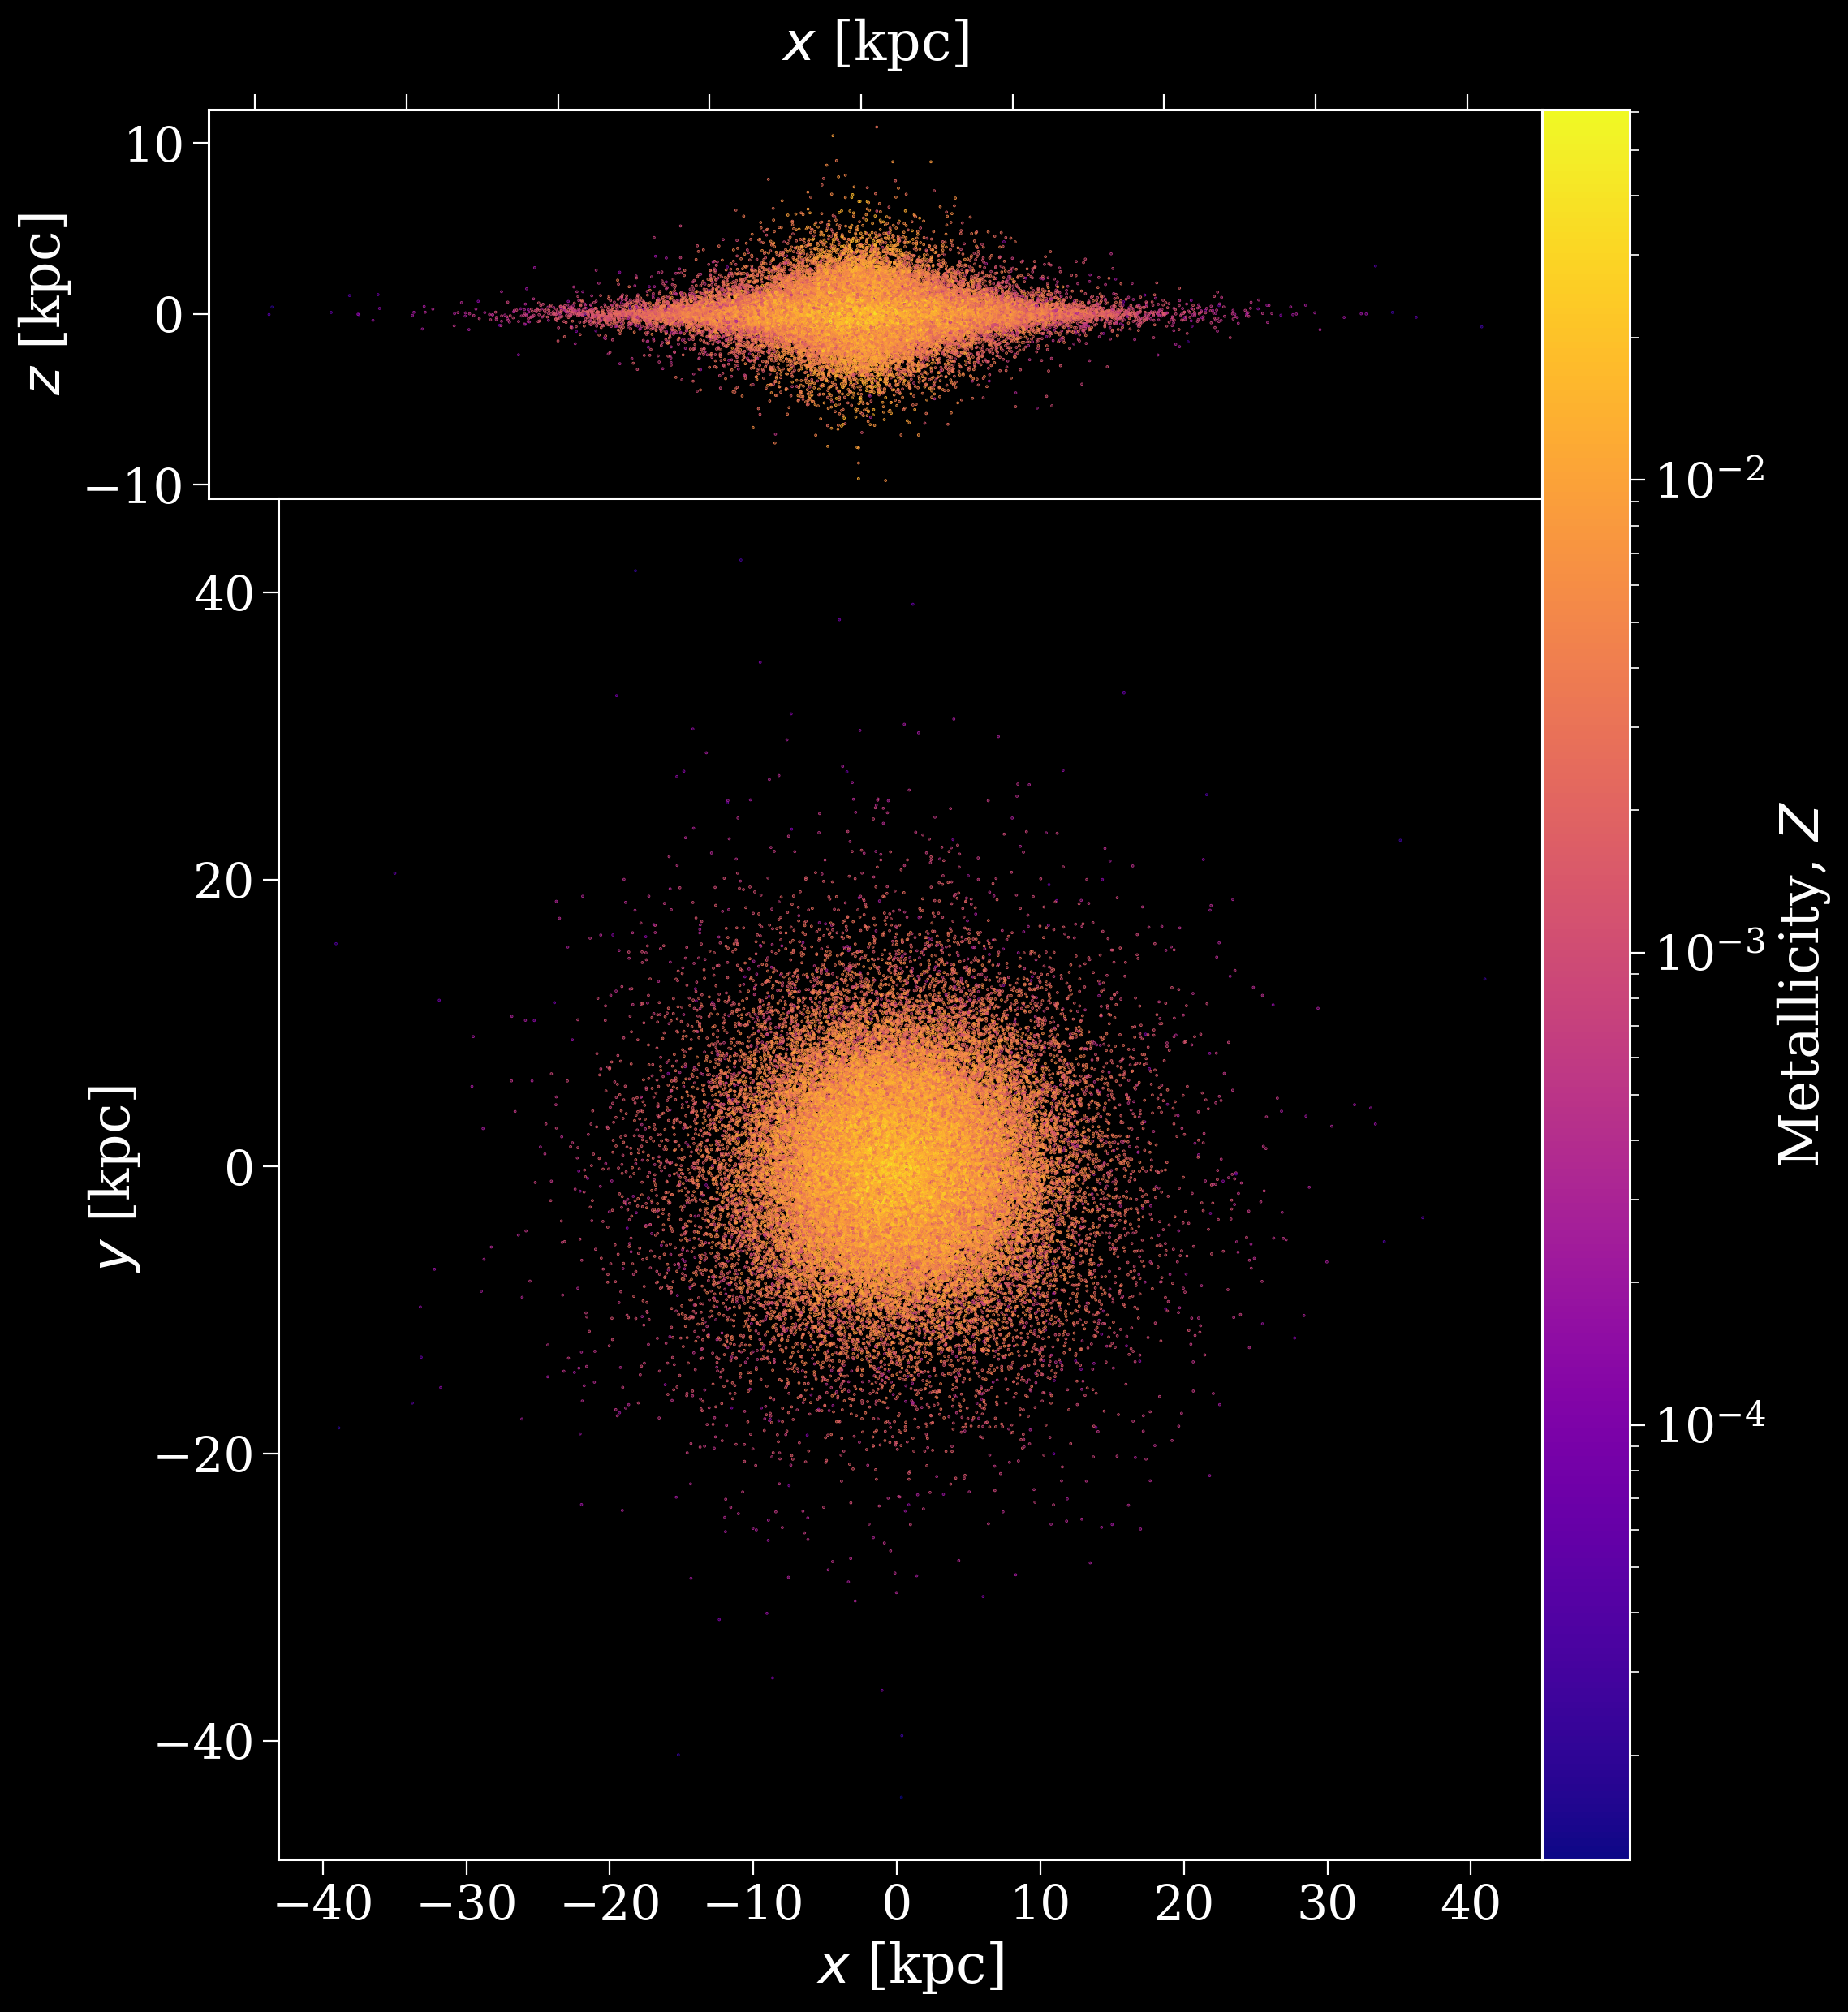

In [4]:
g = cogsworth.galaxy.Wagg2022(size=100000)
g.plot()

Well saving it is remarkably easy, all you need to do is this

In [5]:
g.save("gorgeous_galaxy")

This has just saved everything to ``gorgeous_galaxy.h5``, which contains both the details of the galaxy class and the sampled parameters. But you should never need to interact with these directly, since you can load things back in with a simple call

In [6]:
loaded_g = cogsworth.galaxy.load("gorgeous_galaxy")
assert all(loaded_g.Z == g.Z)

And there's your galaxy, as good as new!

In [7]:
p = cogsworth.pop.Population(100)
p.create_population()

Run for 100 binaries
Ended up with 129 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries
[0.2s] Evolve binaries (run COSMIC)


130it [00:00, 219.93it/s]                                                               


[1.0s] Get orbits (run gala)
Overall: 1.3s


Lovely. Now let's perhaps pick some random things to prove that our loaded population is identical - the total final primary mass of the population and what the first orbit looks like

In [8]:
p.final_bpp["mass_1"].sum()

57.44737140551605

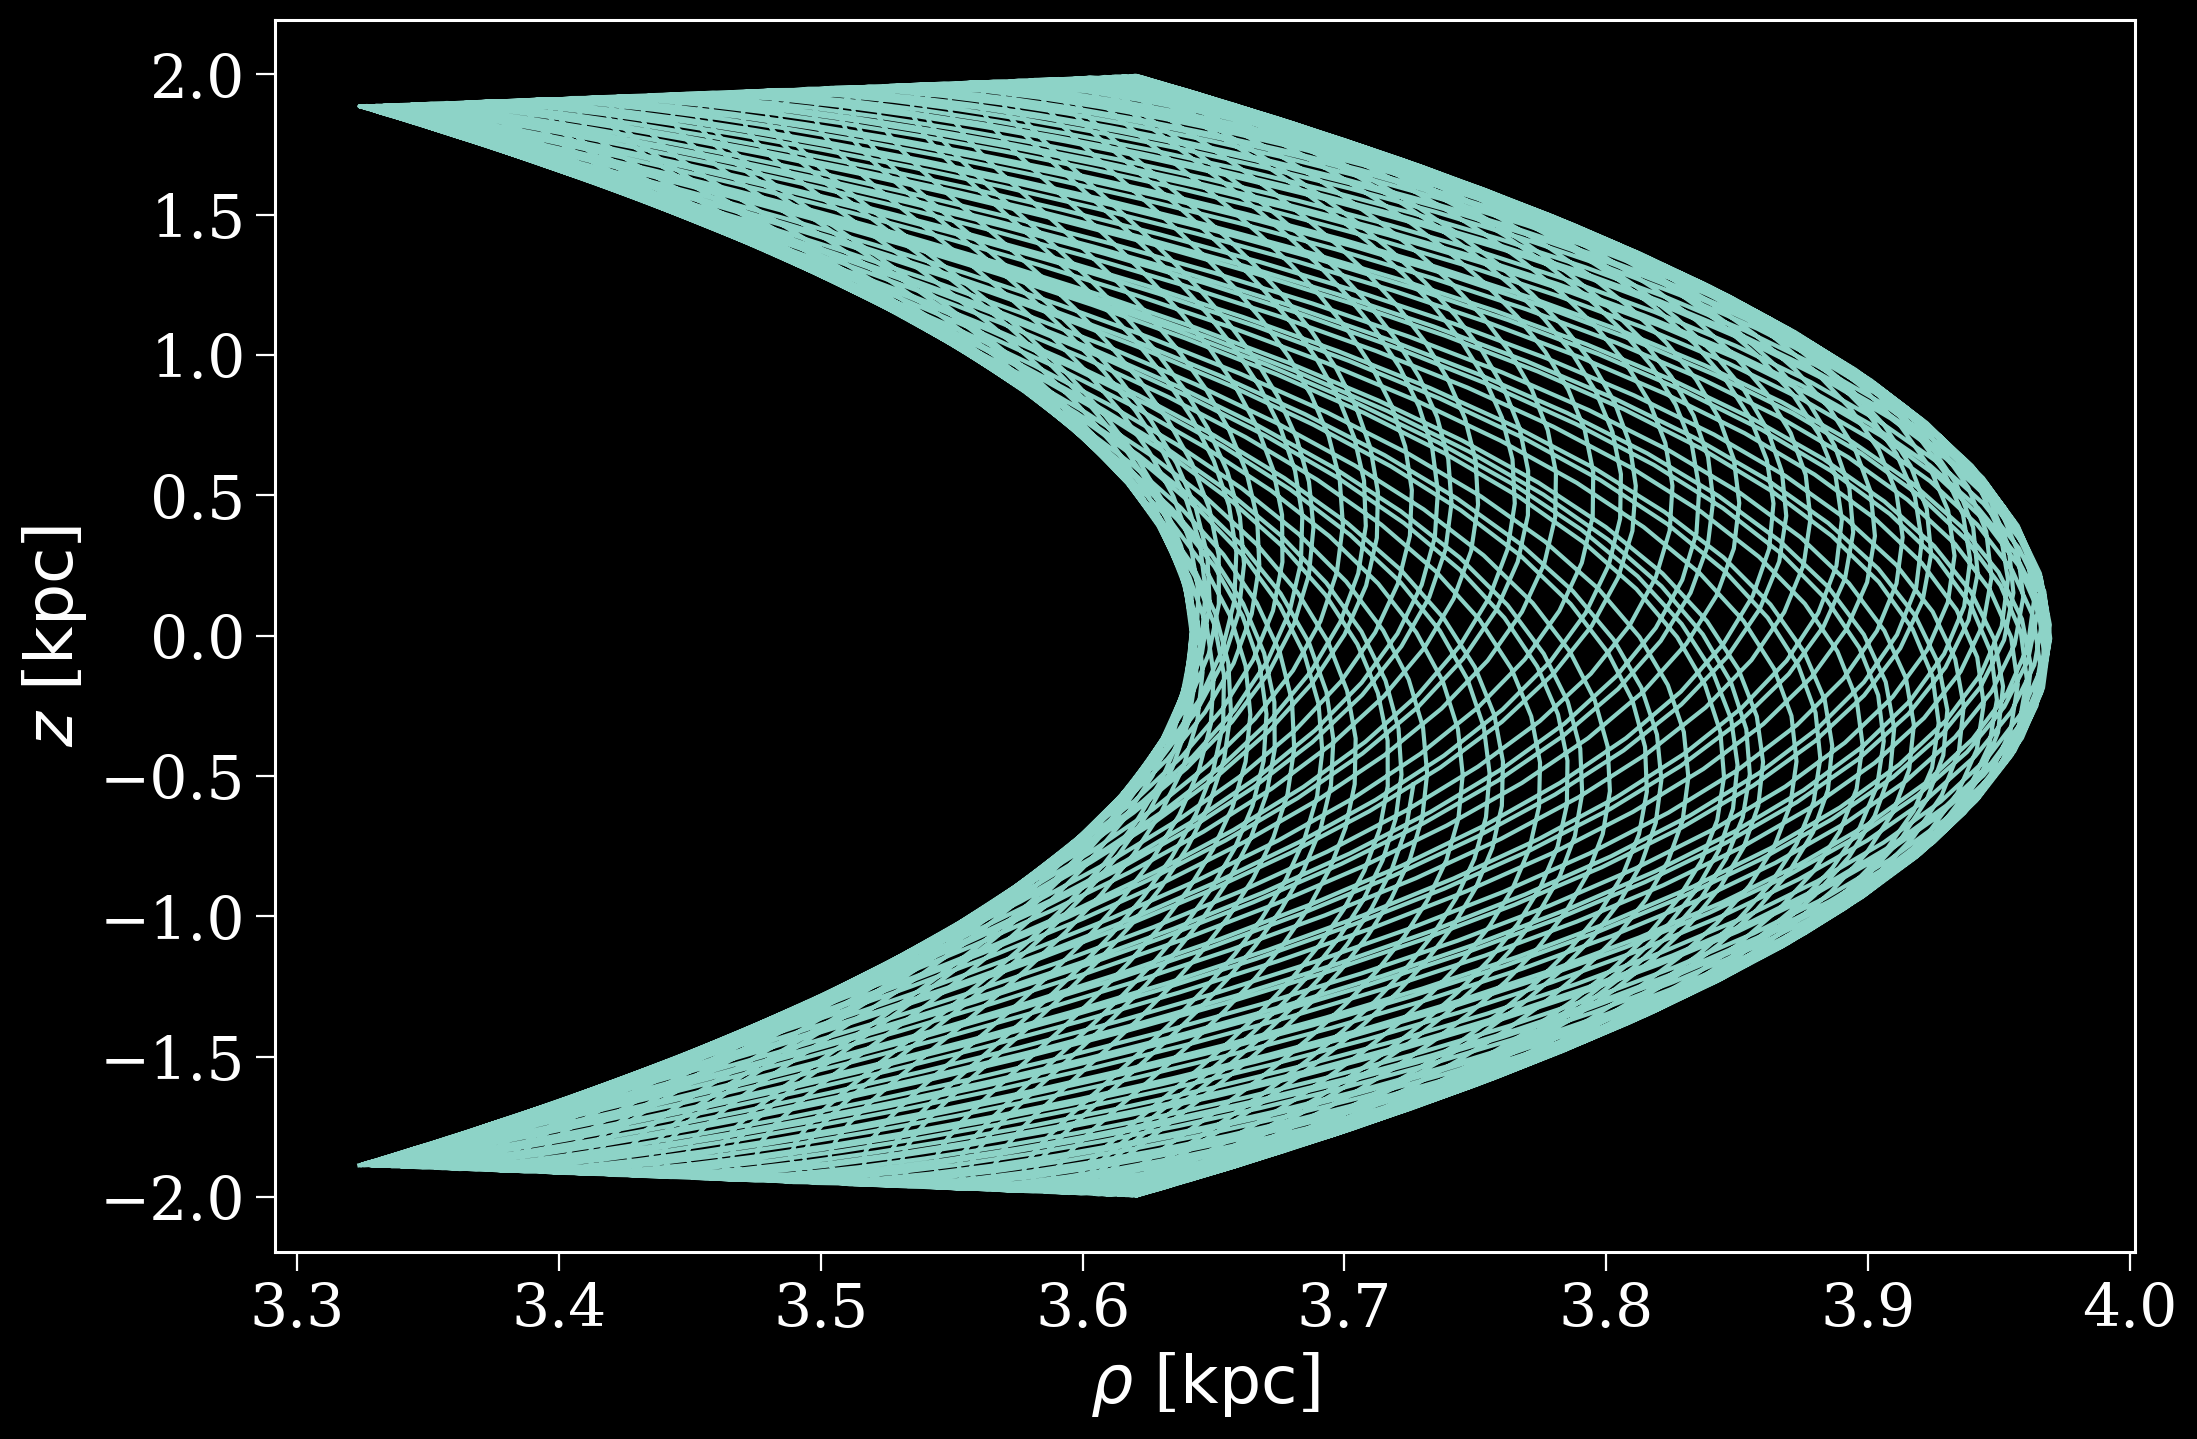

In [9]:
orb = p.orbits[0][0] if isinstance(p.orbits[0], list) else p.orbits[0]
fig, ax = plt.subplots()
orb.cylindrical.plot(["rho", "z"], axes=[ax]);

Okay now for our favourite part - let's save the population for later:

In [11]:
p.save("perfect_population")

That function a *bunch* of informtion about your population to ``perfect_population.h5``, including all of the same galaxy information as the earlier example, initial conditions for your stellar population and full evolutionary and orbital history of each binary.

But as before, no need to worry too much about that as ``cogsworth`` will bring it all back into a population object for you like this

In [12]:
new_p = cogsworth.pop.load("perfect_population")

And let's just confirm that everything looks the before - spoiler alert, it does ;)

In [13]:
new_p.final_bpp["mass_1"].sum()

57.44737140551605

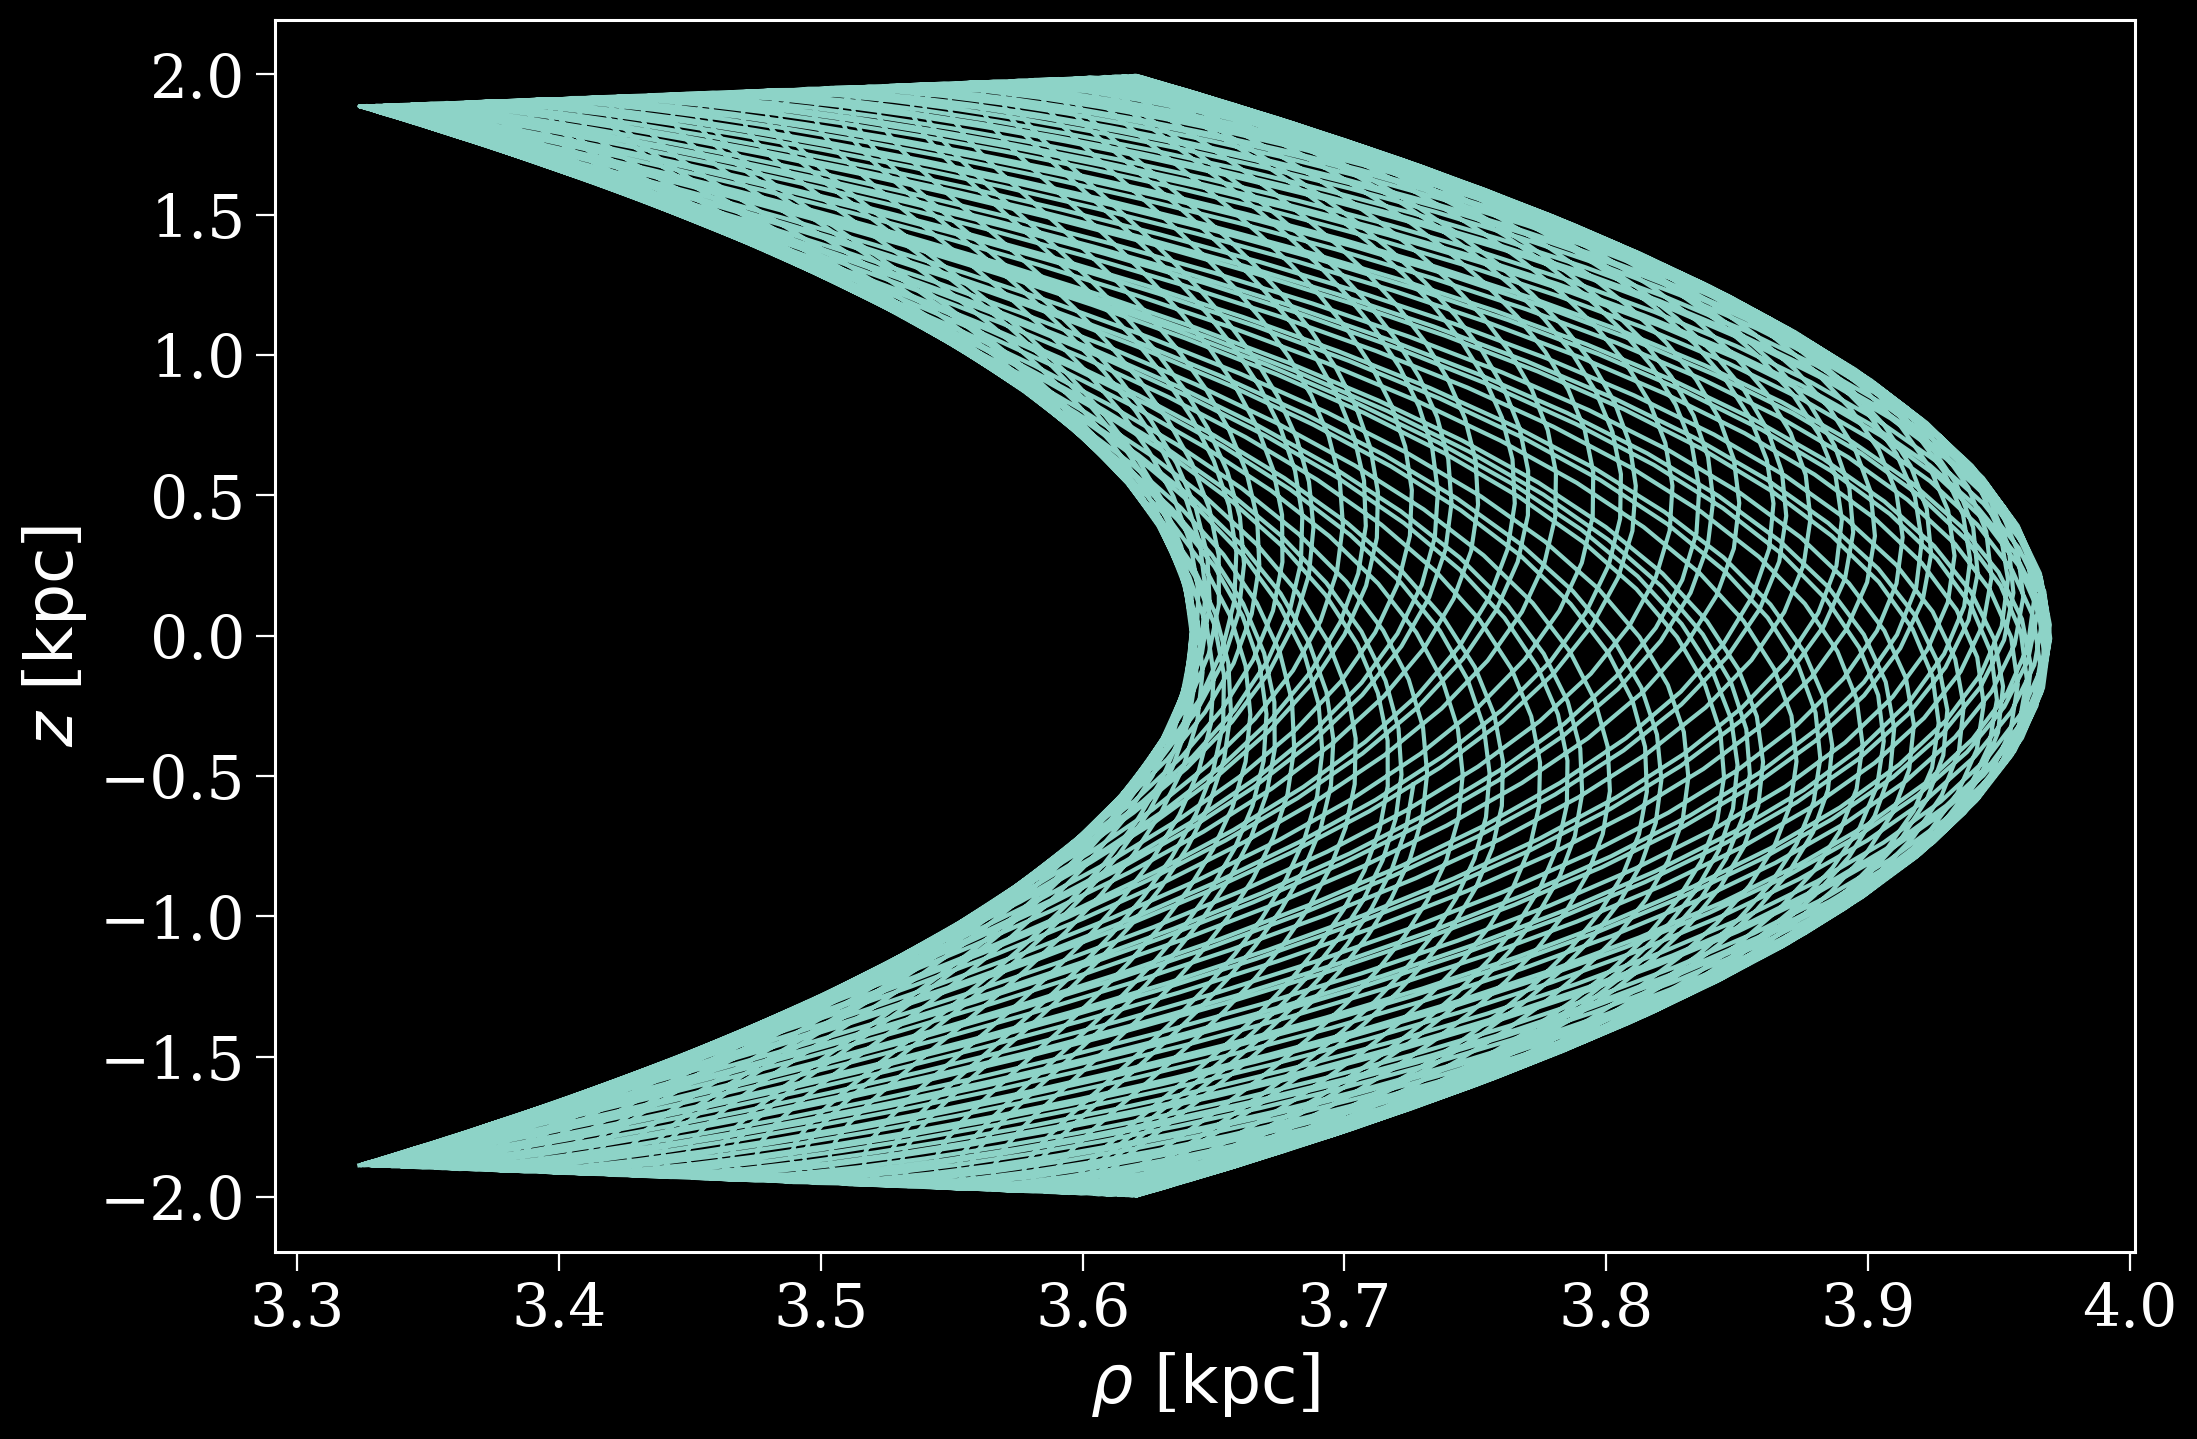

In [14]:
orb = new_p.orbits[0][0] if isinstance(new_p.orbits[0], list) else new_p.orbits[0]
fig, ax = plt.subplots()
orb.cylindrical.plot(["rho", "z"], axes=[ax]);

First we can define some new galaxy class

In [15]:
import numpy as np
import astropy.units as u

# new galaxy where all stars were formed 42 Myr ago
class TomsSwankyNewGalaxy(cogsworth.galaxy.Wagg2022):
    def draw_lookback_times(self, size=None, component="low_alpha_disc"):
        return np.ones(size) * 42 * u.Myr

In [16]:
# make a population with this galaxy class
meaning_of_life = cogsworth.pop.Population(100, galaxy_model=TomsSwankyNewGalaxy)
meaning_of_life.create_population()

Run for 100 binaries
Ended up with 125 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries
[0.2s] Evolve binaries (run COSMIC)


126it [00:00, 892.33it/s]                                                               


[0.2s] Get orbits (run gala)
Overall: 0.5s


In [17]:
meaning_of_life.initial_galaxy.tau

<Quantity [0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042,

Now if we try to save this then ``cogsworth`` will let you, but it'll warn you that it's not sure what to do with ``TomsSwankyNewGalaxy`` and will rely on the parent class instead.

In [18]:
meaning_of_life.save("42")

And as promised we can load it back and the data will be correct

In [19]:
loaded_meaning = cogsworth.pop.load("42")
loaded_meaning.initial_galaxy.tau

<Quantity [0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042,
           0.042, 0.042, 0.042, 0.042,

But if you try to sample again things may get confusing so beware!

In [20]:
loaded_meaning.galaxy_model

cogsworth.galaxy.Wagg2022

In [21]:
loaded_meaning.sample_initial_galaxy()
loaded_meaning.initial_galaxy.tau

<Quantity [ 6.65114865,  3.51772026, 10.22571079,  9.5186313 ,  3.26797922,
           11.29521399,  5.8649165 ,  7.21711762,  3.8244021 ,  5.66954494,
           10.38789549,  6.04730094, 10.33106673, 10.20963841,  6.57692714,
            8.27098004,  8.99668745, 11.165316  ,  0.73056254,  7.30305645,
           11.90315405,  7.31011399, 11.17425914,  9.12523143,  1.26075994,
            6.91071689, 11.64872149,  4.24411891,  2.32128731,  9.88601607,
           11.74185135,  9.48981842,  9.54308549, 11.40544773, 11.4206152 ,
            7.22619257, 10.4044734 , 10.47683147,  9.74119943,  0.84288304,
            8.04804286,  8.51917333, 10.92333879,  6.70099046,  9.13678405,
            1.84515494,  7.13794721,  5.88078012, 11.72371683,  7.16947516,
            9.89697826, 11.7262229 ,  1.3638997 ,  2.37103509, 10.78479424,
            7.0570937 , 10.25196616,  5.65106305,  9.98386821,  9.74869494,
           11.74030036, 10.74294526,  5.82020939,  4.457211  ,  8.65841464,
           1